In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_pickle("Experiments/test/TRAIN_Fluo-N3DH-SIM+_epochs_15_20260128_141303/fusion_weights.pkl")

In [92]:
df.index = df["iter"]
df.head()

,iter,iter_batch,logits_dynamic,logits_static,slice_weights,weights_shape
iter,,,,,,
0,0,0,"[-3.154776, -3.7471652, -3.7854688]","[-0.7077335, 0.1522953, 0.3778513]","[0.2575408, 0.336574, 0.40588516]","(2, 3)"
1,1,1,"[-3.7471652, -3.7854688, -3.8169053]","[-0.7077335, 0.1522953, 0.3778513]","[0.16566943, 0.37680197, 0.45752853]","(2, 3)"
2,2,0,"[1.389719, 1.4700769, 1.474689]","[-0.7077335, 0.1522953, 0.3778513]","[0.14738932, 0.37745988, 0.47515082]","(2, 3)"
3,3,1,"[1.4700769, 1.474689, 1.502571]","[-0.7077335, 0.1522953, 0.3778513]","[0.15544544, 0.36905134, 0.47550327]","(2, 3)"
4,4,0,"[2.024519, 2.9808664, 3.022854]","[-0.7077335, 0.1522953, 0.3778513]","[0.06585254, 0.4049625, 0.529185]","(2, 3)"


In [115]:
# p = df['slice_weights']
p = df['logits_dynamic']


In [116]:
slice_weights = np.stack(p)

In [117]:
print(slice_weights[:, 0].mean())
print(slice_weights[:, 1].mean())
print(slice_weights[:, 2].mean())
print()
print(slice_weights[:, 0].max())
print(slice_weights[:, 1].max())
print(slice_weights[:, 2].max())
print()
print(slice_weights[:, 0].min())
print(slice_weights[:, 1].min())
print(slice_weights[:, 2].min())

0.089756675
0.09004421
0.09008375

3.0799441
3.0799441
3.0799441

-3.8237782
-3.8237782
-3.8237782


In [111]:

x0 = slice_weights[:, 0]
x0.sort()

x1 = slice_weights[:, 1]
x1.sort()

x2 = slice_weights[:, 2]
x2.sort()

x0.mean(), x0.std()

(np.float32(0.15823562), np.float32(0.00917748))

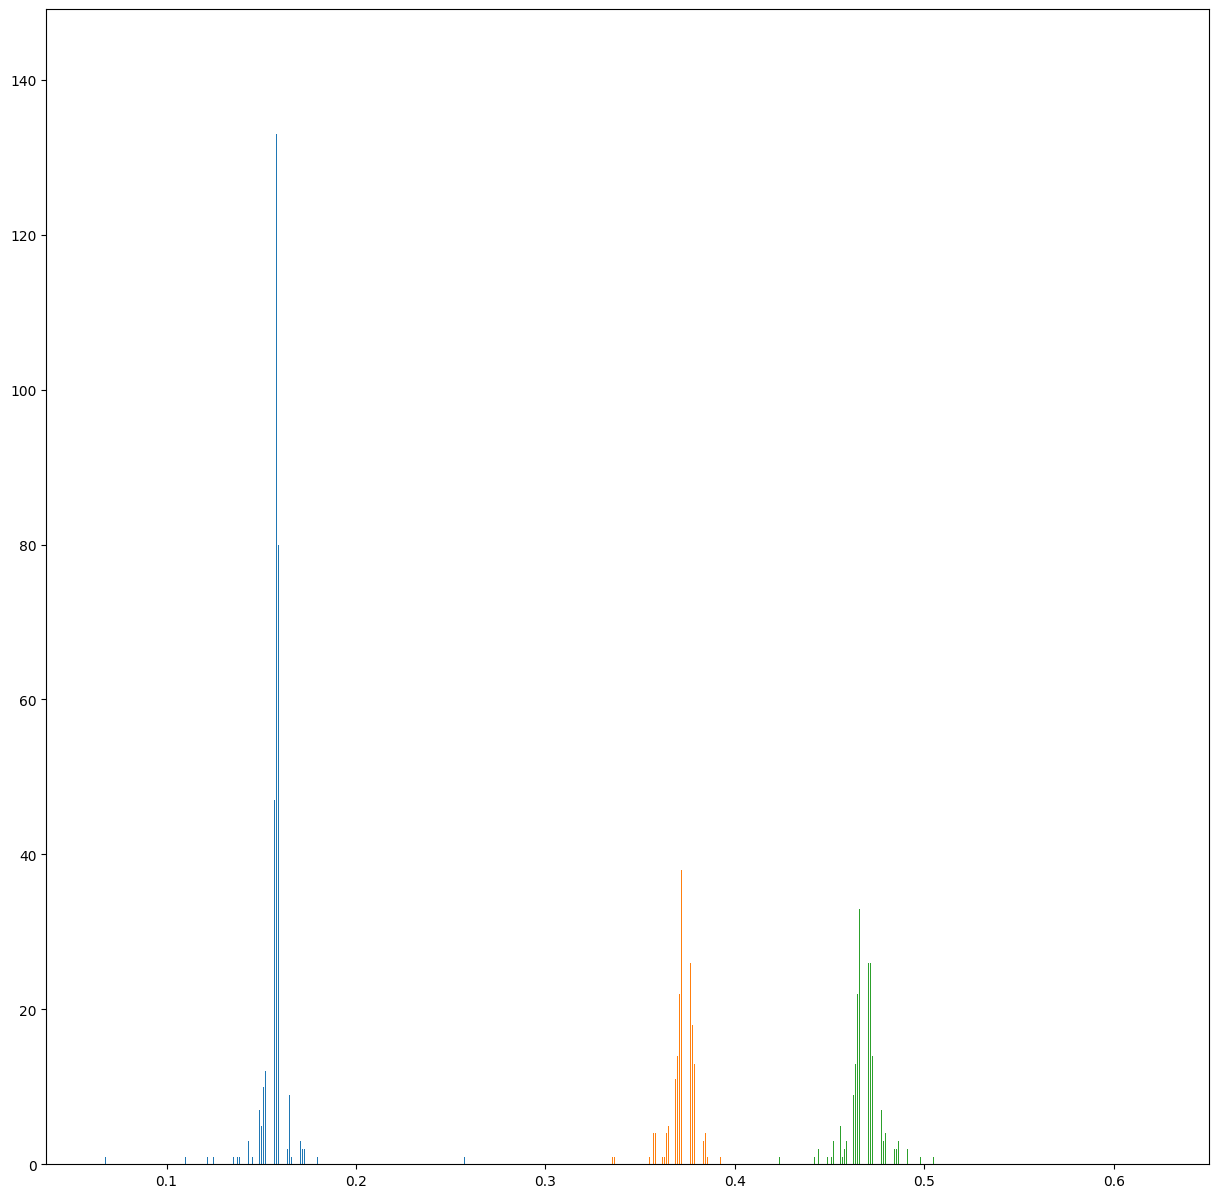

In [112]:
plt.figure(1, (15,15))
plt.hist([x0,x1,x2], bins=10000, label=["sw0", "sw1", "sw2"])
plt.show()

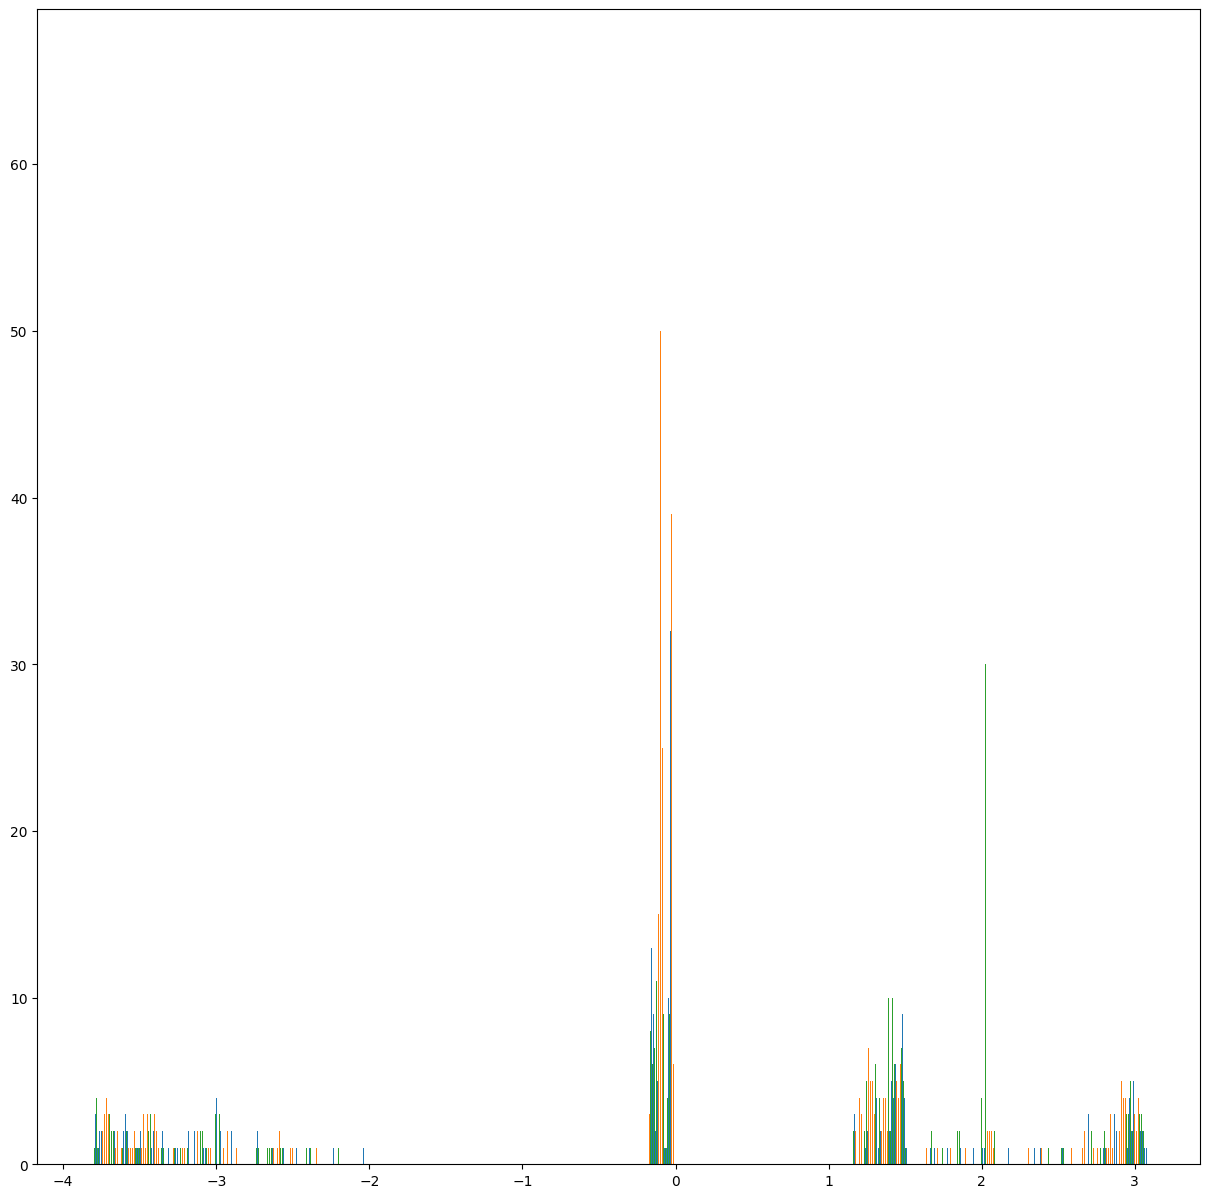

In [107]:
plt.figure(1, (15,15))
plt.hist([x0,x1,x2], bins=10000, label=["sw0", "sw1", "sw2"])
plt.show()

/tmp/ipykernel_163385/2703398298.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


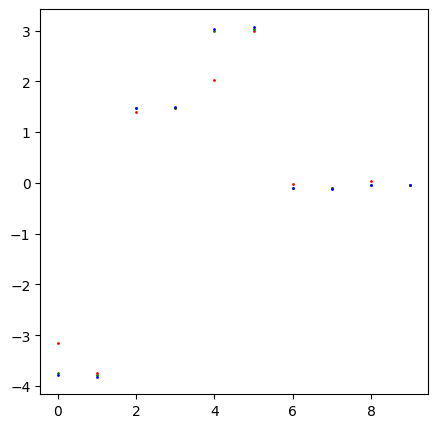

In [118]:
fig = plt.figure(2, (5,5))
plt.plot(slice_weights[:10, 0], linestyle='None', marker='o', markersize=1, color='red')
plt.plot(slice_weights[:10, 1], linestyle='None', marker='o', markersize=1, color='green')
plt.plot(slice_weights[:10, 2], linestyle='None', marker='o', markersize=1, color='blue')
fig.show()

In [239]:
df = pd.read_pickle("Experiments/test/TRAIN_Fluo-N3DH-SIM+_epochs_15_20260128_145342/fusion_weights.pkl")

In [240]:
df.head()

,iter,iter_batch,logits_dynamic,logits_static,slice_weights,weights_shape
0,0,0,"[[[-1.4320254, -1.4295064, -1.4295659], [-1.59...","[0.018717771, -0.109031245, 0.058862966]","[[[0.3417846, 0.3015545, 0.35666087], [0.34230...","(2, 29, 29, 3)"
1,1,1,"[[[-1.4295064, -1.4295659, -1.4295374], [-1.59...","[0.018717771, -0.109031245, 0.058862966]","[[[0.3423542, 0.3012792, 0.35636663], [0.34234...","(2, 29, 29, 3)"
2,2,0,"[[[-1.7086345, -1.7330322, -1.7329854], [-1.18...","[0.018717771, -0.109031245, 0.058862966]","[[[0.34785247, 0.29875737, 0.3533902], [0.3553...","(2, 15, 15, 3)"
3,3,1,"[[[-1.7330322, -1.7329854, -1.7329897], [-1.24...","[0.018717771, -0.109031245, 0.058862966]","[[[0.34233424, 0.30129367, 0.35637203], [0.342...","(2, 15, 15, 3)"
4,4,0,"[[[-0.616818, -0.7494048, -0.74955934], [-0.01...","[0.018717771, -0.109031245, 0.058862966]","[[[0.37280682, 0.28735676, 0.33983636], [0.514...","(2, 8, 8, 3)"


In [241]:
b = len(df.iter_batch.unique())
b


2

(1770, 29, 29, 3)
(1770, 15, 15, 3)
(1770, 8, 8, 3)
(1770, 4, 4, 3)
(1770, 2, 2, 3)


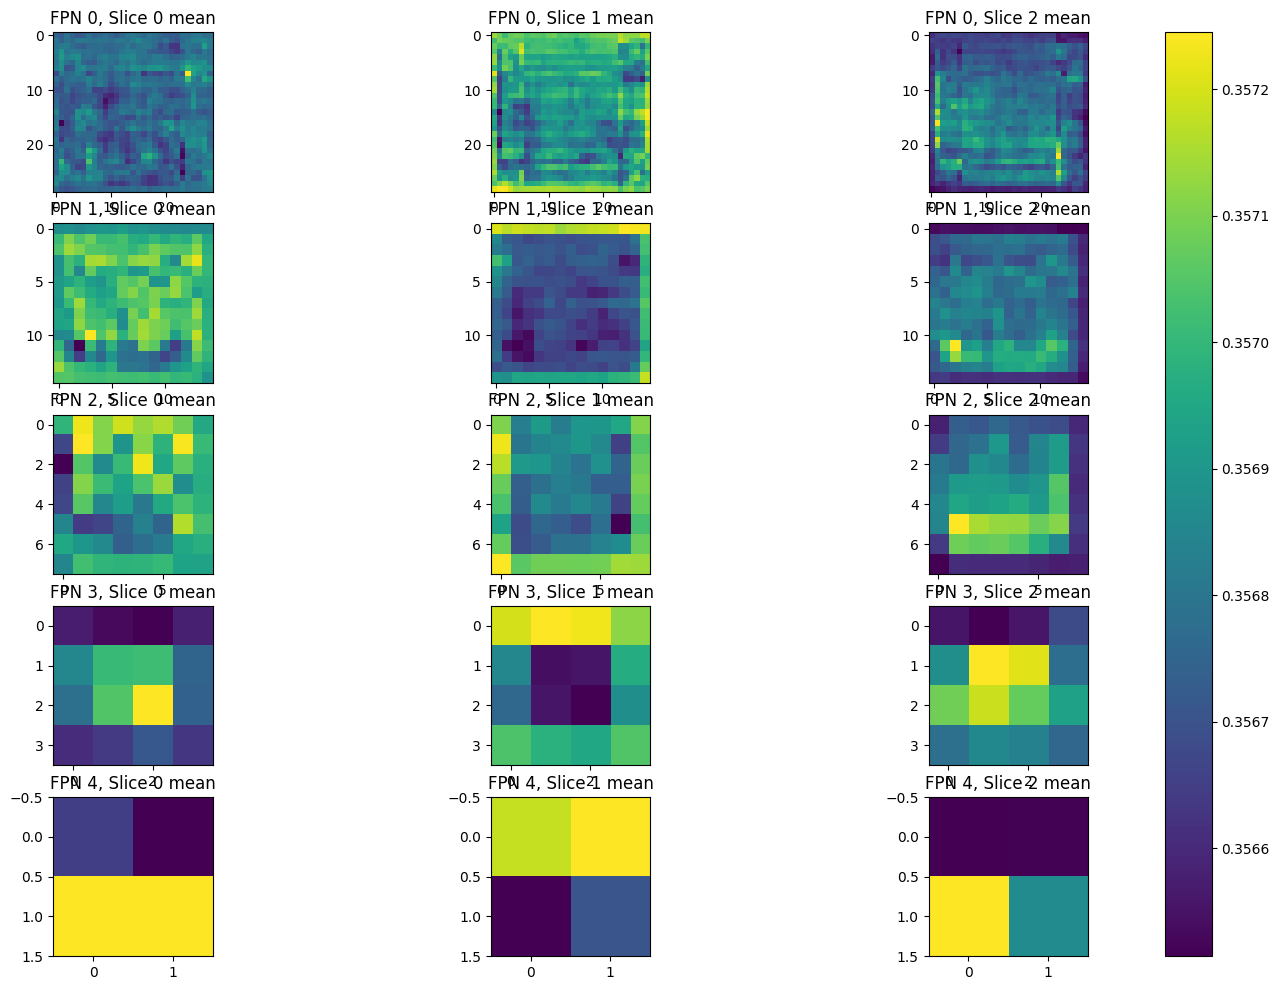

In [243]:
fig_windowed_fpn0 = plt.figure("windowed sliceSE slice_weights", (20, 12))
axes = fig_windowed_fpn0.subplots(5, 3)

for fpn_id in range(5):
    fpn = pd.concat([df[b*fpn_id::10], df[b*fpn_id+1::10]])
    fpn.reset_index(inplace=True)

    fpn_slice_weights = fpn["slice_weights"].copy()
    fpn_slice_weights = np.stack(fpn_slice_weights)
    print(fpn_slice_weights.shape)

    spatial_mean = fpn_slice_weights.mean(axis=0)
    for i in range(3):
        im = axes[fpn_id, i].imshow(spatial_mean[:, :, i])
        axes[fpn_id, i].set_title(f"FPN {fpn_id}, Slice {i} mean")

plt.colorbar(im, ax=axes)
plt.show()   


(1770, 29, 29, 3)
(1770, 15, 15, 3)
(1770, 8, 8, 3)
(1770, 4, 4, 3)
(1770, 2, 2, 3)


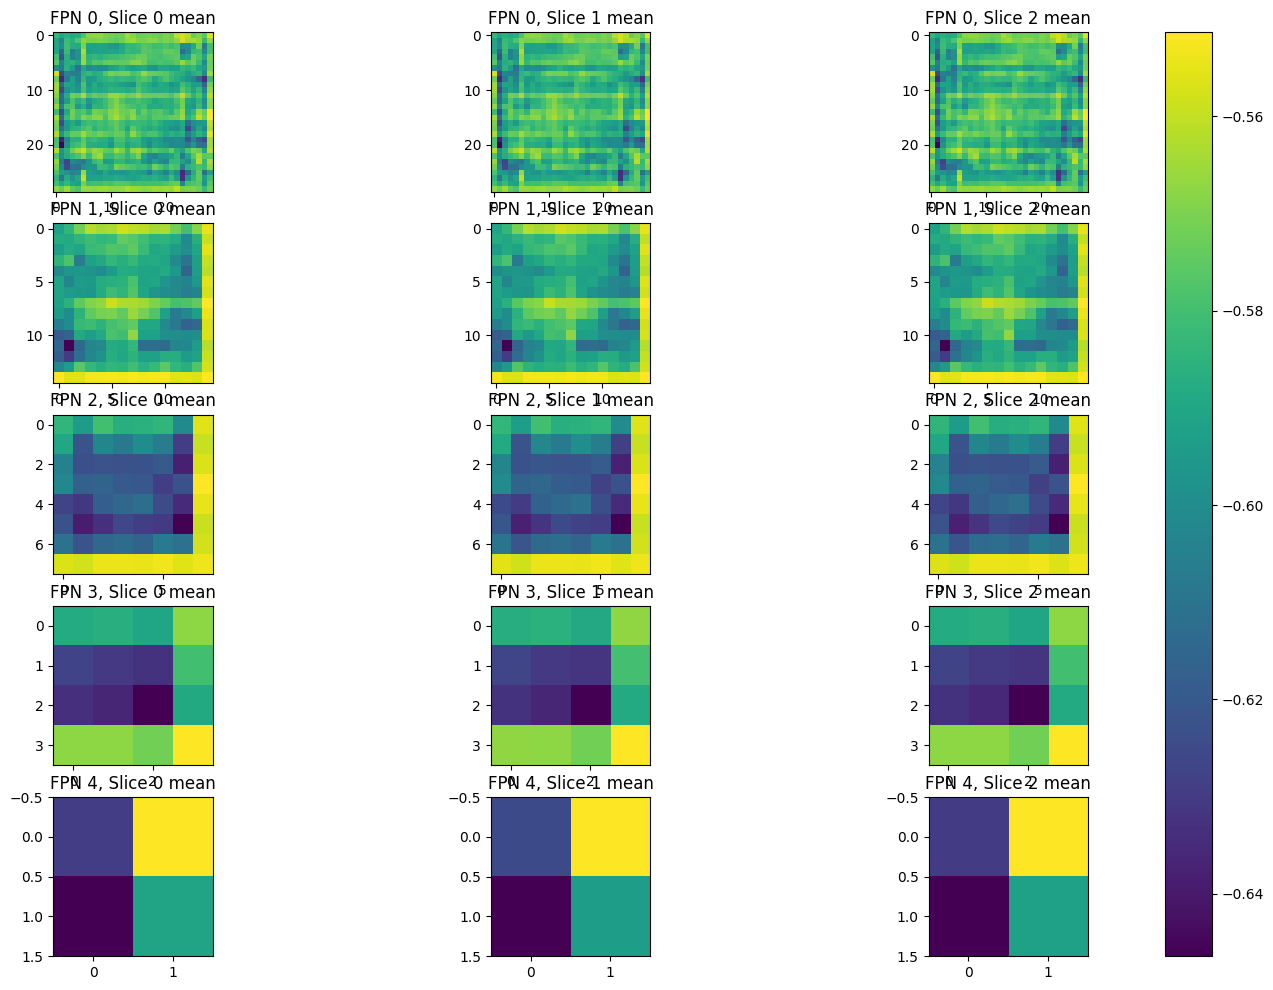

In [244]:
fig_windowed_fpn0 = plt.figure("windowed sliceSE logits_dynmaic", (20, 12))
axes = fig_windowed_fpn0.subplots(5, 3)

for fpn_id in range(5):
    fpn = pd.concat([df[b*fpn_id::10], df[b*fpn_id+1::10]])
    fpn.reset_index(inplace=True)

    fpn_slice_weights = fpn["logits_dynamic"].copy()
    fpn_slice_weights = np.stack(fpn_slice_weights)
    print(fpn_slice_weights.shape)

    spatial_mean = fpn_slice_weights.mean(axis=0)
    for i in range(3):
        im = axes[fpn_id, i].imshow(spatial_mean[:, :, i])
        axes[fpn_id, i].set_title(f"FPN {fpn_id}, Slice {i} mean")

plt.colorbar(im, ax=axes)
plt.show()   

In [245]:
df =  pd.read_pickle("Experiments/test/TRAIN_Fluo-N3DH-SIM+_epochs_15_20260128_150827/fusion_weights.pkl")
df.head()

,iter,iter_batch,logits_dynamic,logits_static,slice_weights,weights_shape
0,0,0,"[[[0.15069899, -0.21416165, -0.15506743, -0.11...","[0.19928716, 0.4312332, 0.32744634]","[[[0.29252604, 0.30109164, 0.29860187, 0.29686...","(2, 3, 200, 200)"
1,1,1,"[[[0.15070568, -0.2141077, -0.15512227, -0.114...","[0.19928716, 0.4312332, 0.32744634]","[[[0.2925166, 0.30108938, 0.2986042, 0.2968658...","(2, 3, 200, 200)"
2,2,0,"[[[-1.8884938, -2.5840316, -2.9614584, -3.9132...","[0.19928716, 0.4312332, 0.32744634]","[[[0.0035971755, 0.021533925, 0.015241756, 0.0...","(2, 3, 100, 100)"
3,3,1,"[[[-1.8879881, -2.5837793, -2.9612608, -3.9135...","[0.19928716, 0.4312332, 0.32744634]","[[[0.0035996423, 0.021540102, 0.01524579, 0.00...","(2, 3, 100, 100)"
4,4,0,"[[[-11.215328, -16.841698, -17.771395, -16.853...","[0.19928716, 0.4312332, 0.32744634]","[[[2.086984e-06, 2.2113359e-07, 2.0711642e-08,...","(2, 3, 50, 50)"


In [260]:
b = len(df["iter_batch"].unique())
b

2

(1770, 200, 200, 3)
(1770, 100, 100, 3)
(1770, 50, 50, 3)
(1770, 25, 25, 3)
(1770, 13, 13, 3)


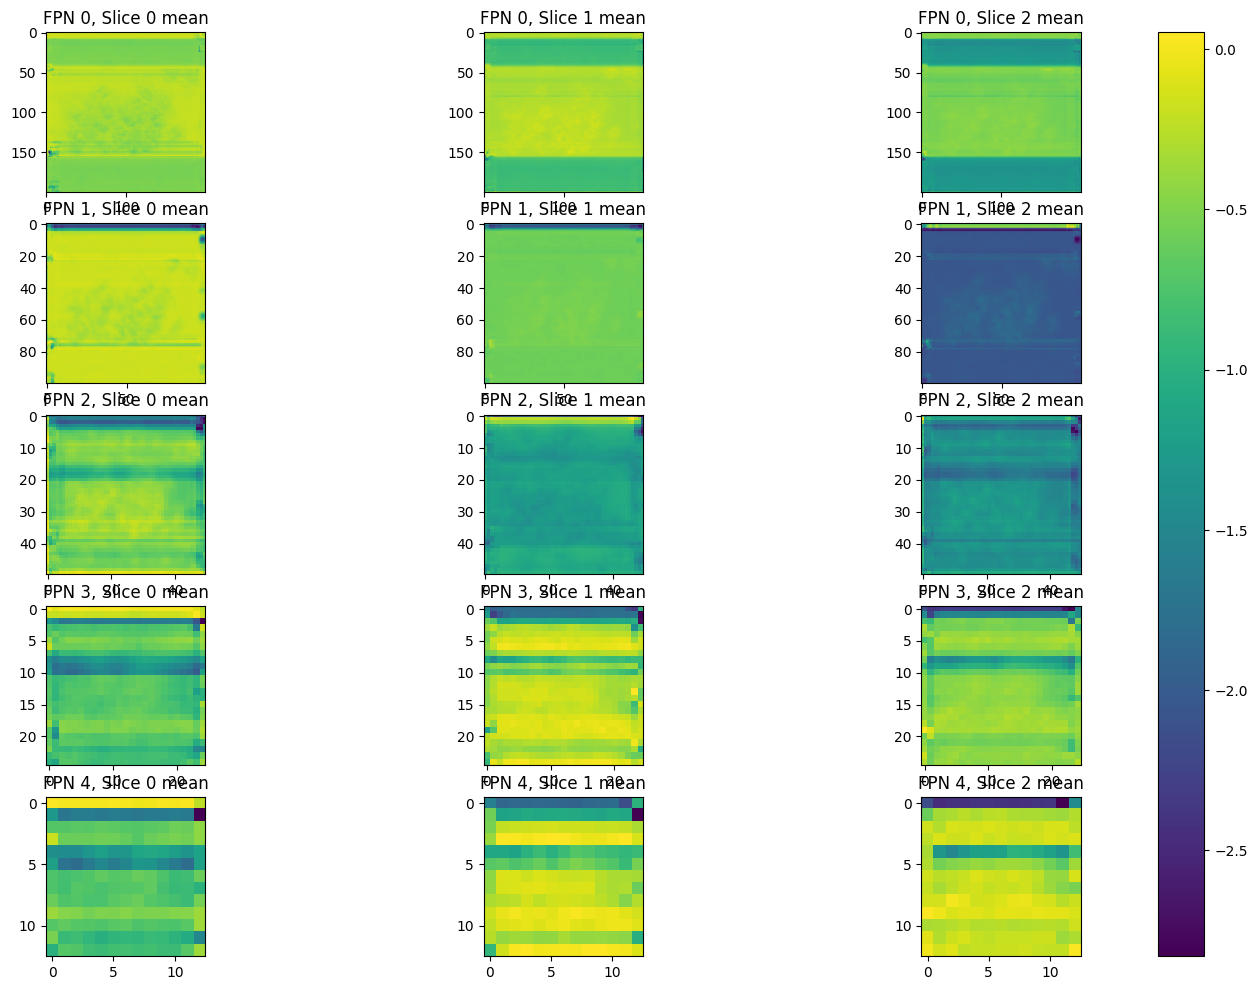

In [262]:
fig_windowed_fpn0 = plt.figure("pixel sliceSE logits_dynmaic", (20, 12))
axes = fig_windowed_fpn0.subplots(5, 3)

for fpn_id in range(5):
    fpn = pd.concat([df[b*fpn_id::10], df[b*fpn_id+1::10]])
    fpn.reset_index(inplace=True)

    fpn_slice_weights = fpn["logits_dynamic"].copy()
    fpn_slice_weights = np.stack(fpn_slice_weights)
    fpn_slice_weights = fpn_slice_weights.transpose(0,2,3,1)
    print(fpn_slice_weights.shape)


    spatial_mean = fpn_slice_weights.mean(axis=0)
    for i in range(3):
        im = axes[fpn_id, i].imshow(spatial_mean[:, :, i])
        axes[fpn_id, i].set_title(f"FPN {fpn_id}, Slice {i} mean")

plt.colorbar(im, ax=axes)
plt.show() 

(1770, 200, 200, 3)
(1770, 100, 100, 3)
(1770, 50, 50, 3)
(1770, 25, 25, 3)
(1770, 13, 13, 3)


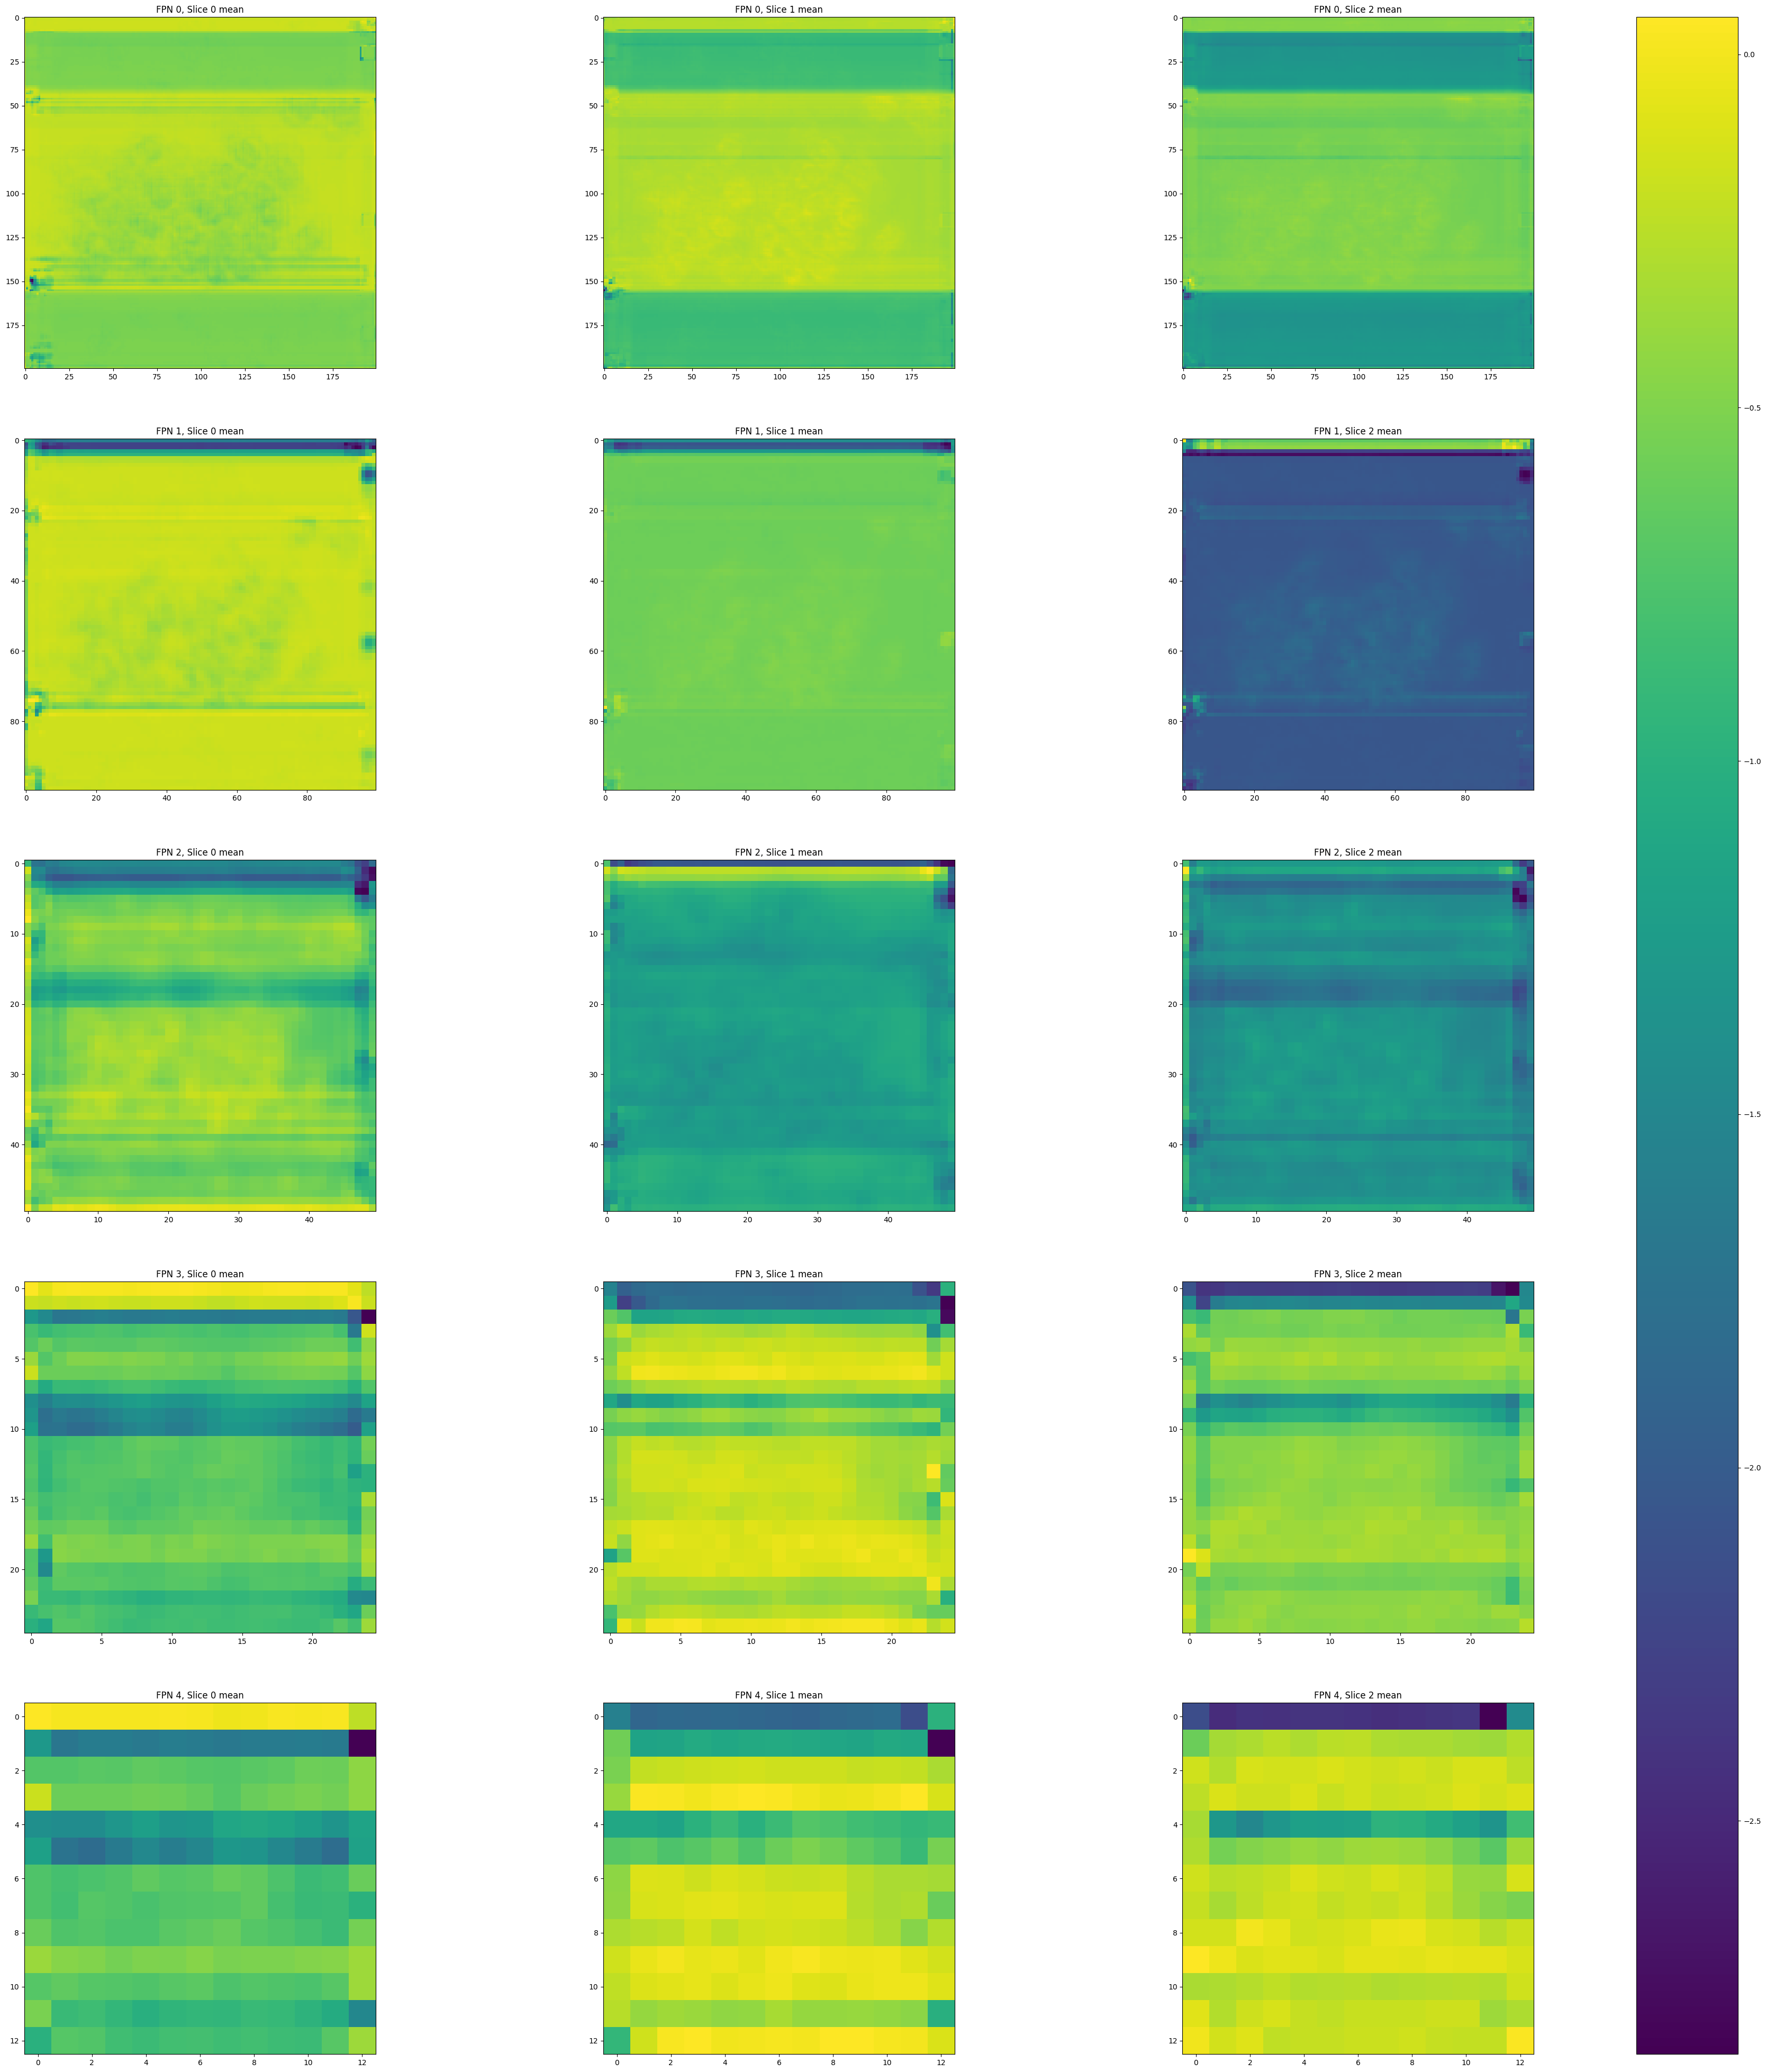

In [267]:
fig_windowed_fpn0 = plt.figure("pixel sliceSE slice_weights", (50, 50))
axes = fig_windowed_fpn0.subplots(5, 3)

for fpn_id in range(5):
    fpn = pd.concat([df[b*fpn_id::10], df[b*fpn_id+1::10]])
    fpn.reset_index(inplace=True)

    fpn_slice_weights = fpn["logits_dynamic"].copy()
    fpn_slice_weights = np.stack(fpn_slice_weights)
    fpn_slice_weights = fpn_slice_weights.transpose(0,2,3,1)
    print(fpn_slice_weights.shape)


    spatial_mean = fpn_slice_weights.mean(axis=0)
    for i in range(3):
        im = axes[fpn_id, i].imshow(spatial_mean[:, :, i])
        axes[fpn_id, i].set_title(f"FPN {fpn_id}, Slice {i} mean")

plt.colorbar(im, ax=axes)
plt.show() 